# Coursera Course analysis

The analysis is conducted to answer the most crucial Coursera Course questions, undercover the most impactful insights.

### Initialisation
Importing dependancies, read csv, visualisation tools.

In [3]:
import pandas as pd
import numpy as np
import cufflinks as cf
import seaborn as sns
import plotly.express as px
%matplotlib inline

import matplotlib.pyplot as plt

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/coursera-course-dataset/coursea_data.csv


Dataset observation - getting to know to Coursera dataset.

In [8]:
df = pd.read_csv("/kaggle/input/coursera-course-dataset/coursea_data.csv")

df.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


In [10]:
#starting the rows from index 1
course_data.index = np.arange(1, len(course_data) +1)

In [11]:
#dropping unnecessary column 'Unnamed:'
df = course_data.drop('Unnamed: 0', axis=1)

In [12]:
#checking dataset frames again
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
1,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
2,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
3,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
4,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
5,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [13]:
num_observations = df.shape[0]
num_observations

891

In [14]:
num_features = df.shape[1]
num_features

6

In [18]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

categorical_features

['course_title',
 'course_organization',
 'course_Certificate_type',
 'course_difficulty',
 'course_students_enrolled']

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    object 
dtypes: float64(1), object(5)
memory usage: 48.7+ KB


In [20]:
numeric_features = df.select_dtypes(include=['number']).columns.tolist()
numeric_features

['course_rating']

## Data observation
There are 891 observations and 6 features in the dataset.
5 of features are categorical and 1 numeric, called 'course rating'.

In [21]:
# Ensure 'course_students_enrolled' column is treated as strings
df['course_students_enrolled'] = df['course_students_enrolled'].astype(str)

# Function to convert 'k' and 'm' notations to numeric
def convert_to_numeric(value):
    if 'k' in value:
        return float(value.replace('k', '')) * 1000
    elif 'm' in value:
        return float(value.replace('m', '')) * 1000000
    else:
        return float(value)

# Apply the function to the 'course_students_enrolled' column
df['course_students_enrolled'] = df['course_students_enrolled'].apply(convert_to_numeric)

# Verify the conversion
print(df['course_students_enrolled'].head())

1      5300.0
2     17000.0
3    130000.0
4     91000.0
5    320000.0
Name: course_students_enrolled, dtype: float64


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    float64
dtypes: float64(2), object(4)
memory usage: 48.7+ KB


Students enrolled changed to float, so to conduct further analysis.

## Data Cleaning

Dataset has no null/NaN valus or duplicates.

In [22]:
df.isnull().any()

course_title                False
course_organization         False
course_Certificate_type     False
course_rating               False
course_difficulty           False
course_students_enrolled    False
dtype: bool

In [23]:
num_dup = df.duplicated().sum()

print(f"There are {num_dup} duplicates in the dataset")

There are 0 duplicates in the dataset


In [24]:
df.isna().any().sum()

0

In [25]:
df.describe()

,course_rating,course_students_enrolled
count,891.000000,8.910000e+02
mean,4.677329,9.055208e+04
std,0.162225,1.819365e+05
min,3.300000,1.500000e+03
25%,4.600000,1.750000e+04
50%,4.700000,4.200000e+04
75%,4.800000,9.950000e+04
max,5.000000,3.200000e+06


How many courses does each difficulty have?

In [29]:
#bringing the table to see courses number per each difficulty.
courses_per_difficulty = df['course_difficulty'].value_counts().reset_index()

# Rename the columns for clarity
courses_per_difficulty.columns = ['Course Difficulty', 'Total Courses']

# Display the result
courses_per_difficulty


,Course Difficulty,Total Courses
0,Beginner,487
1,Intermediate,198
2,Mixed,187
3,Advanced,19


How many courses does each Specilization have?

In [30]:
# Group the data by course organization (specialization) and count the number of courses in each specialization
courses_per_specialization = df['course_Certificate_type'].value_counts().reset_index()

# Rename the columns for clarity
courses_per_specialization.columns = ['Specialization', 'Total Courses']

# Display the result
courses_per_specialization

,Specialization,Total Courses
0,COURSE,582
1,SPECIALIZATION,297
2,PROFESSIONAL CERTIFICATE,12


## The main analysis body

How many organizations with how many courses are included in the dataset?

In [32]:
unique_organizations = df['course_organization'].nunique()
unique_courses = df['course_title'].count()

print(f'There are {unique_organizations} organizations with {unique_courses} courses in the dataset')

There are 154 organizations with 891 courses in the dataset


Which organisations have more than 10 courses?

In [34]:
courses_per_org = df['course_organization'].value_counts()
orgs_with_more_than_10_courses = courses_per_org[courses_per_org > 10]

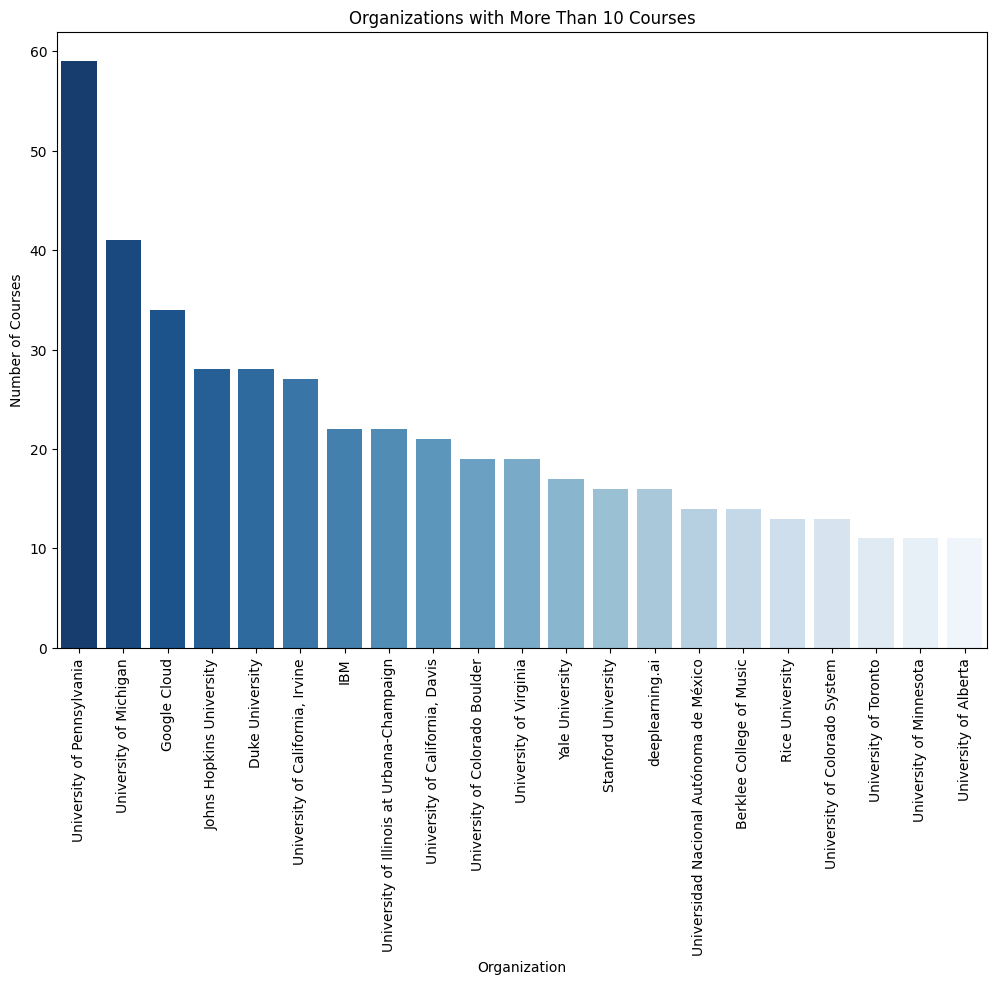

In [39]:
plt.figure(figsize=(12, 8))
sns.barplot(
    x=orgs_with_more_than_10_courses.index,
    y=orgs_with_more_than_10_courses.values,
    palette="Blues_r",
)
plt.title("Organizations with More Than 10 Courses")
plt.xlabel("Organization")
plt.ylabel("Number of Courses")
plt.xticks(rotation=90)
plt.show()

There are 20 organisations with more than 10 courses. However, it's interesting to see how they are rated so far?

In [40]:
# Filter the dataframe to include only the organizations with more than 10 courses
orgs_with_more_than_10_df = df[
    df["course_organization"].isin(orgs_with_more_than_10_courses.index)
]

# Calculate the mean course rating and the number of courses for each organization
org_grouped = (
    orgs_with_more_than_10_df.groupby("course_organization")
    .agg(
        Mean_Course_Rating=("course_rating", "mean"),
        Number_of_Courses=("course_title", "count"),
    )
    .reset_index()
)

# Rename columns for better readability
org_grouped.columns = ["Organization", "Mean Course Rating", "Number of Courses"]

# Sort the organizations by mean course rating
org_grouped_sorted = org_grouped.sort_values(by="Mean Course Rating", ascending=False)
org_grouped_sorted.reset_index(drop=True, inplace=True)

# Display the table
org_grouped_sorted

,Organization,Mean Course Rating,Number of Courses
0,Yale University,4.817647,17
1,Berklee College of Music,4.807143,14
2,Stanford University,4.768750,16
3,Universidad Nacional Autónoma de México,4.750000,14
4,deeplearning.ai,4.743750,16
5,University of Michigan,4.729268,41
6,University of Alberta,4.727273,11
7,University of Virginia,4.715789,19
8,University of Colorado System,4.715385,13
9,University of Pennsylvania,4.696610,59


Given that total ratings mean is 4.68, more courses doesn't really mean lower rating.

What are 5 the most popular courses?

In [37]:
#find the top 5 coursers by how many students enrolled.
top_5_courses = df.nlargest(5,'course_students_enrolled')
top_5_courses.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
565,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200000.0
816,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000.0
689,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000.0
675,Programming for Everybody (Getting Started wit...,University of Michigan,COURSE,4.8,Mixed,1300000.0
197,Data Science,Johns Hopkins University,SPECIALIZATION,4.5,Beginner,830000.0


The 5 most popular courses are in Mixed and Beginner difficulty categories.

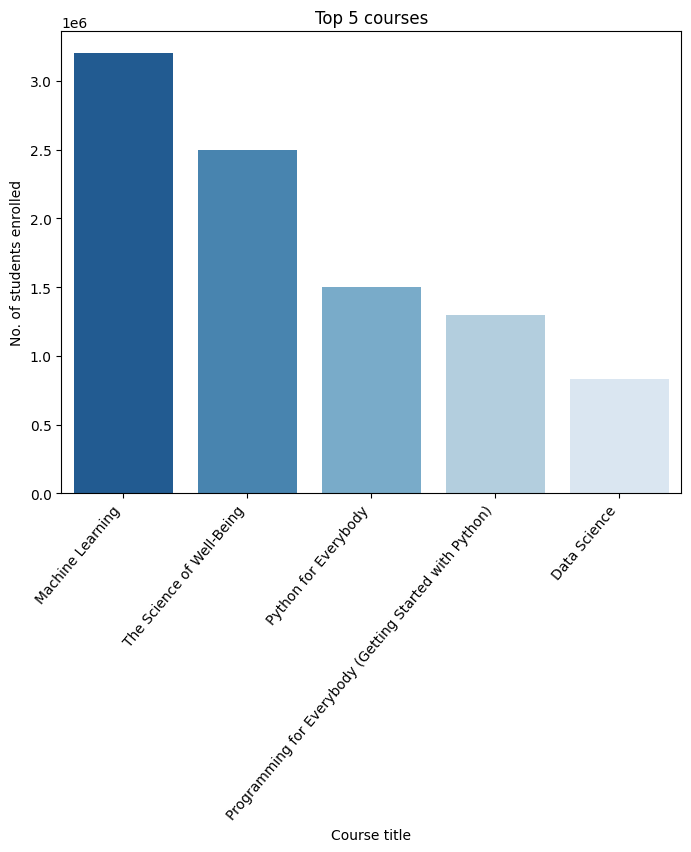

In [41]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x="course_title",
    y="course_students_enrolled",
    data=top_5_courses,
    palette="Blues_r",
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_xlabel("Course title")
ax.set_ylabel("No. of students enrolled")
ax.set_title("Top 5 courses")
plt.show()

The most students enrolled are in 2 dominating courses: Machine learning and the Science of Well Being.

In [44]:
# sorting the courses by the popularity
sorted_courses = df.sort_values(by="course_students_enrolled", ascending=False)
# setting up the table to show main info about the top 5 courses
courses_info = sorted_courses.nlargest(5, "course_students_enrolled")[
    [
        "course_title",
        "course_difficulty",
        "course_Certificate_type",
        "course_students_enrolled",
    ]
]
courses_info

,course_title,course_difficulty,course_Certificate_type,course_students_enrolled
565,Machine Learning,Mixed,COURSE,3200000.0
816,The Science of Well-Being,Mixed,COURSE,2500000.0
689,Python for Everybody,Beginner,SPECIALIZATION,1500000.0
675,Programming for Everybody (Getting Started wit...,Mixed,COURSE,1300000.0
197,Data Science,Beginner,SPECIALIZATION,830000.0


Top courses are mostly mixed ones or beginner difficulty.

Which are the best rated organizations?

In [46]:
# Calculate the mean course rating and number of courses per organization
rating_and_courses_per_organization = (
    df.groupby("course_organization")
    .agg({"course_rating": "mean", "course_title": "count"})
    .reset_index()
    .rename(
        columns={
            "course_rating": "mean_course_rating",
            "course_title": "number_of_courses",
        }
    )
)

# Sort the organizations by mean course rating in descending order and get the top rated ones
top_rated_organizations = rating_and_courses_per_organization.sort_values(
    by="mean_course_rating", ascending=False
).head(10)

# Display the table
top_rated_organizations

,course_organization,mean_course_rating,number_of_courses
36,Hebrew University of Jerusalem,4.900000,1
61,"Nanyang Technological University, Singapore",4.900000,1
112,Universidade Estadual de Campinas,4.900000,1
19,Crece con Google,4.900000,1
51,London Business School,4.900000,1
33,Google - Spectrum Sharing,4.900000,1
83,ScrumTrek,4.900000,1
113,Universidade de São Paulo,4.866667,3
95,The University of Chicago,4.850000,2
111,Universidad de los Andes,4.820000,5


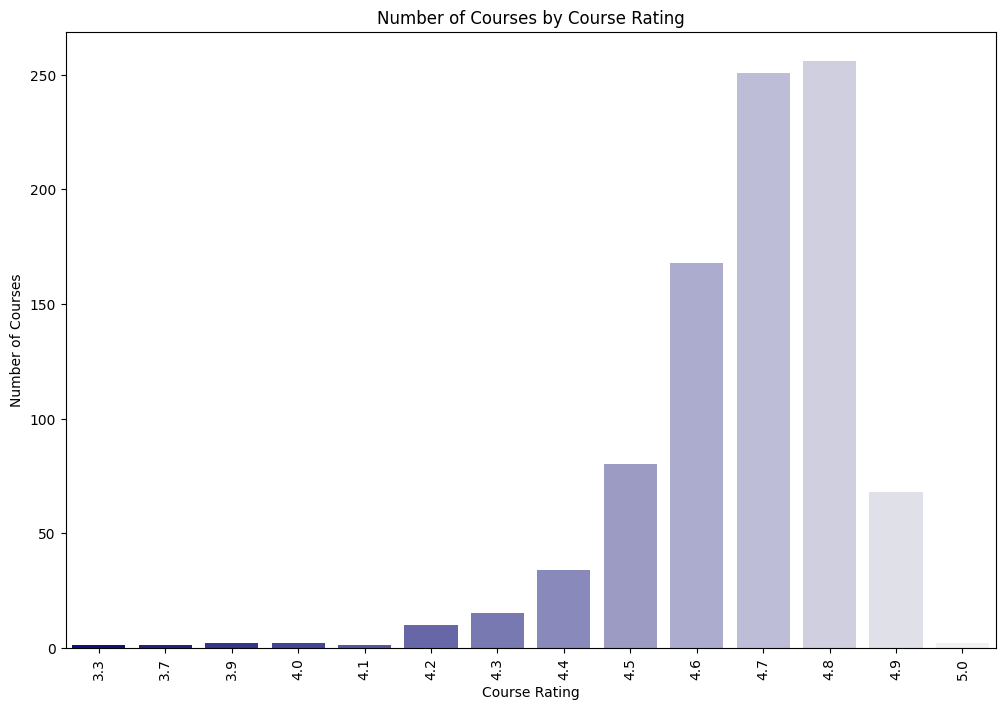

In [47]:
# Relationship between the number of courses and their quality (mean ratings)

courses_and_ratings = (
    df.groupby("course_organization")
    .agg({"course_title": "count", "course_rating": "mean"})
    .rename(
        columns={"course_title": "number_of_courses", "course_rating": "mean_rating"}
    )
    .sort_values(by="mean_rating", ascending=False)
)

courses_by_rating = df["course_rating"].value_counts().sort_index()

# Bar chart to visualize the relationship
plt.figure(figsize=(12, 8))
colors = sns.light_palette("darkblue", len(courses_by_rating), reverse=True)
sns.barplot(x=courses_by_rating.index, y=courses_by_rating.values, palette=colors)
plt.title("Number of Courses by Course Rating")
plt.xlabel("Course Rating")
plt.ylabel("Number of Courses")
plt.xticks(rotation=90)
plt.show()


Most of the courses gather between 4.7-4.8 rating, which shows no big variety in the ratings.

## The course difficulty vs. number of students enrolled

Here we can see that the the most popular courses are beginner and mixed difficulty courses.

In [48]:
# Calculate the number of students enrolled by course difficulty
students_by_difficulty = (
    df.groupby("course_difficulty")["course_students_enrolled"].sum().reset_index()
)

# Sort the difficulty levels
difficulty_order = ["Beginner", "Intermediate", "Mixed", "Advanced"]
students_by_difficulty["course_difficulty"] = pd.Categorical(
    students_by_difficulty["course_difficulty"],
    categories=difficulty_order,
    ordered=True,
)
students_by_difficulty = students_by_difficulty.sort_values("course_difficulty")

# Verify the calculated values
print(students_by_difficulty)

  course_difficulty  course_students_enrolled
1          Beginner                39921800.0
2      Intermediate                14506300.0
3             Mixed                24989400.0
0          Advanced                 1264400.0


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



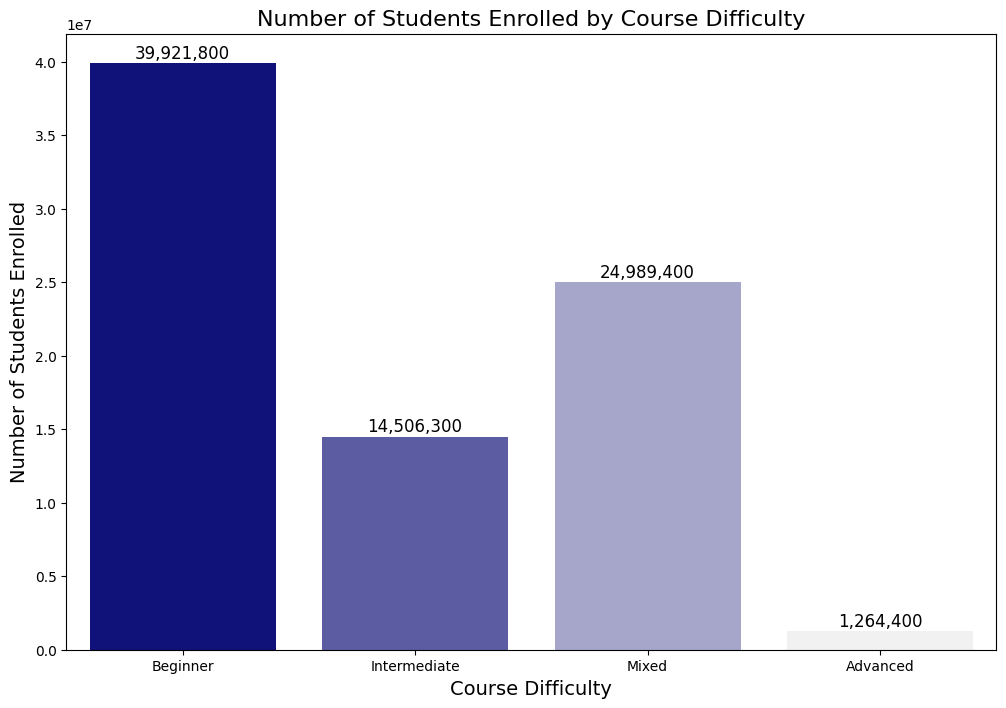

In [49]:
# Create a bar chart for students enrolled by course difficulty
plt.figure(figsize=(12, 8))

# Define a blue color palette
colors = sns.light_palette("darkblue", len(students_by_difficulty), reverse=True)

# Create the bar chart
sns.barplot(
    x="course_difficulty",
    y="course_students_enrolled",
    data=students_by_difficulty,
    palette=colors,
)

# Add titles and labels
plt.title("Number of Students Enrolled by Course Difficulty", fontsize=16)
plt.xlabel("Course Difficulty", fontsize=14)
plt.ylabel("Number of Students Enrolled", fontsize=14)

# Add value annotations on the bars
for index, value in enumerate(students_by_difficulty["course_students_enrolled"]):
    plt.text(
        index, value + 50000, f"{int(value):,}", ha="center", va="bottom", fontsize=12
    )

# Show the plot
plt.show()

The most popular courses (as we see again) are Beginner and Mixed levels.

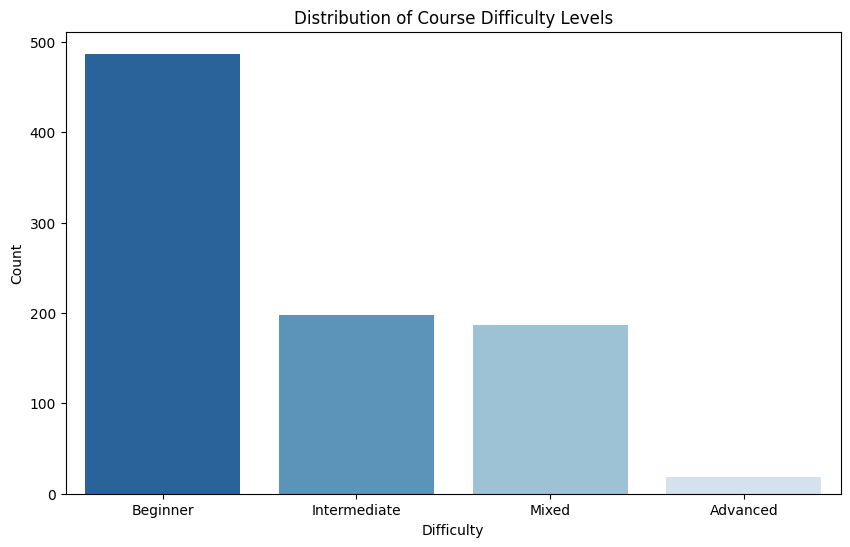

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(x='course_difficulty', data=df, palette='Blues_r')
plt.title('Distribution of Course Difficulty Levels')
plt.xlabel('Difficulty')
plt.ylabel('Count')
plt.show()

Even though, there there is a bigger courses number in the Intermediate level.

## Difficulty vs. course rating
Is there any relation between course rating and the difficulty level?

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



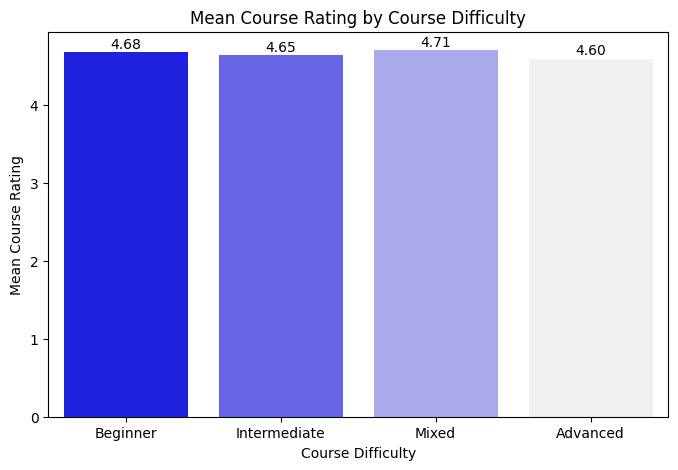

In [51]:
# Calculate the mean course rating by course difficulty
mean_rating_by_difficulty = (
    df.groupby("course_difficulty")["course_rating"].mean().reset_index()
)

# Sort the difficulty levels
difficulty_order = ["Beginner", "Intermediate", "Mixed", "Advanced"]
mean_rating_by_difficulty["course_difficulty"] = pd.Categorical(
    mean_rating_by_difficulty["course_difficulty"],
    categories=difficulty_order,
    ordered=True,
)
mean_rating_by_difficulty = mean_rating_by_difficulty.sort_values("course_difficulty")

# Create a bar chart to visualize the mean course rating by difficulty
plt.figure(figsize=(8, 5))

colors = sns.light_palette("blue", len(mean_rating_by_difficulty), reverse=True)

sns.barplot(
    x="course_difficulty",
    y="course_rating",
    data=mean_rating_by_difficulty,
    palette=colors,
)

plt.title("Mean Course Rating by Course Difficulty", fontsize=12)
plt.xlabel("Course Difficulty", fontsize=10)
plt.ylabel("Mean Course Rating", fontsize=10)

# Add value annotations on the bars
for index, value in enumerate(mean_rating_by_difficulty["course_rating"]):
    plt.text(index, value + 0.01, f"{value:.2f}", ha="center", va="bottom", fontsize=10)

plt.show()

Course difficulty had no impact for the course rating, these are almost identical with the highest difference of 0.11 between 'Mixed' and 'Advanced'.

#### What is the relation between course rating, number of enrolled students and how they are linked with the course difficulty level?

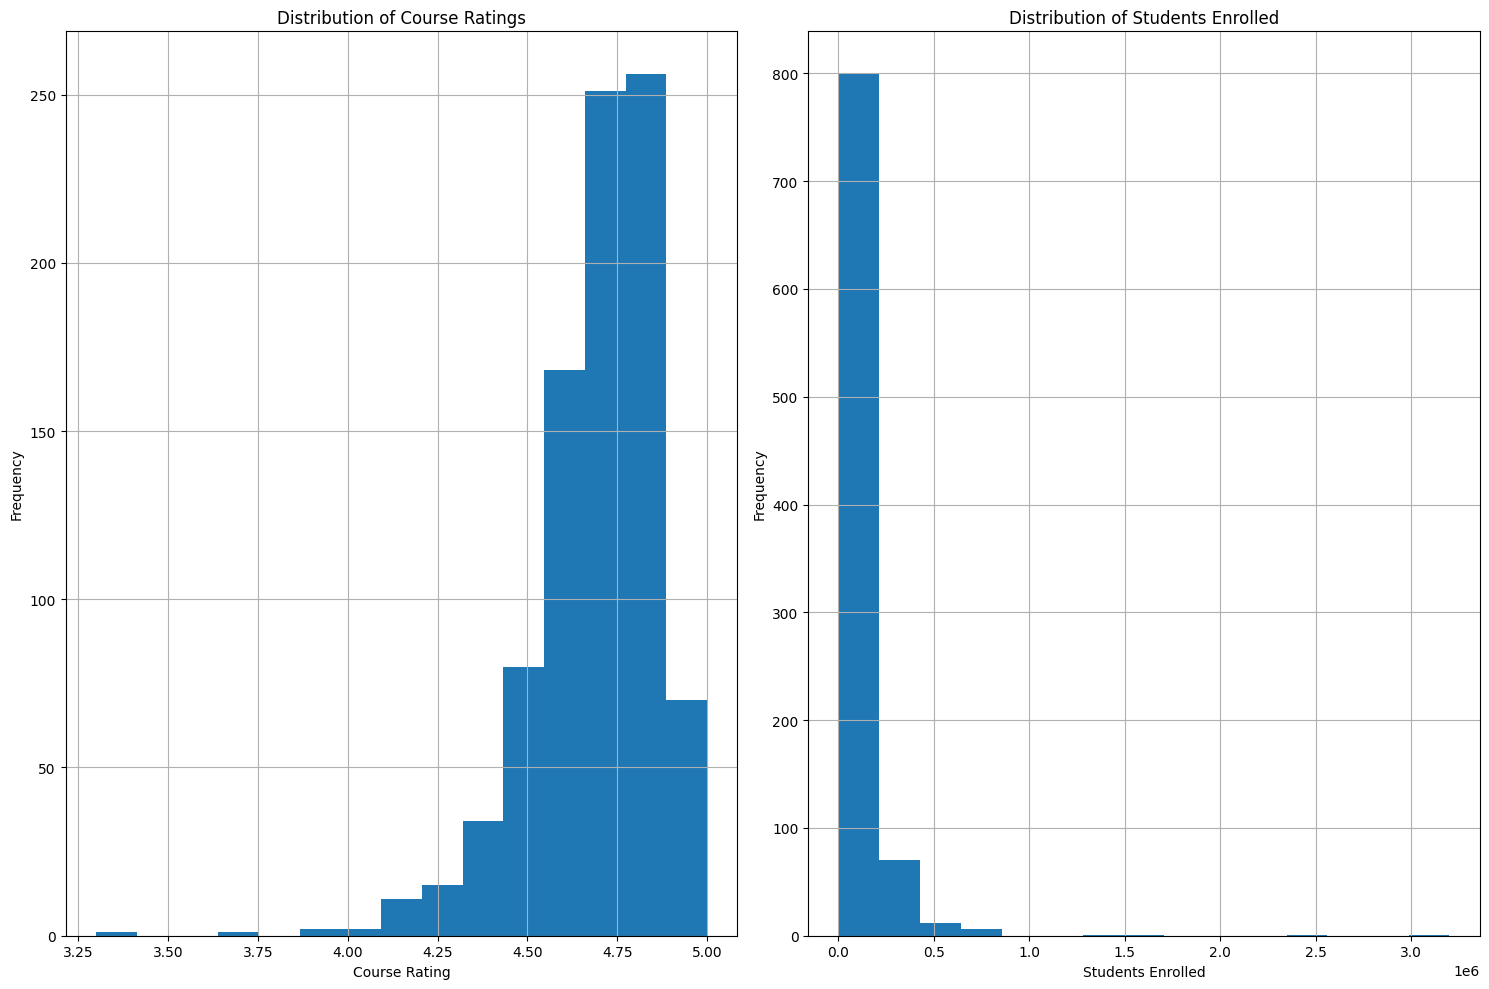

In [52]:
# Distribution of numerical features
axes = df[["course_rating", "course_students_enrolled"]].hist(bins=15, figsize=(15, 10))

# Adding titles and axis labels to each subplot
axes[0, 0].set_title("Distribution of Course Ratings")
axes[0, 0].set_xlabel("Course Rating")
axes[0, 0].set_ylabel("Frequency")

axes[0, 1].set_title("Distribution of Students Enrolled")
axes[0, 1].set_xlabel("Students Enrolled")
axes[0, 1].set_ylabel("Frequency")

plt.tight_layout()  # Adjusts subplots to fit into figure area.
plt.show()

- The histogram for **course_students_enrolled** shows a right-skewed distribution, indicating that most courses have relatively fewer students, but some have a very large number of students.
- Course ratings: the histogram is skewed to the right, it indicates that most courses have higher ratings.

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



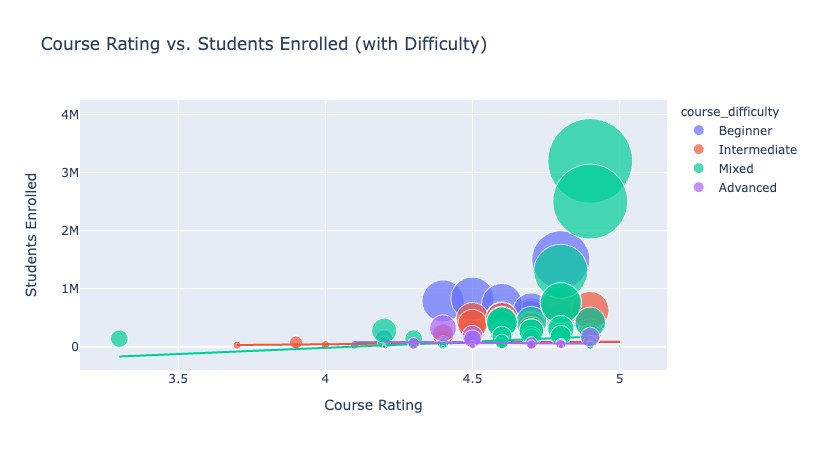

In [54]:
import plotly.express as px

# Create an interactive scatter plot with Plotly
fig = px.scatter(
    df,
    x="course_rating",
    y="course_students_enrolled",
    color="course_difficulty",
    size="course_students_enrolled",
    hover_data=["course_title"],
    title="Course Rating vs. Students Enrolled (with Difficulty)",
    labels={
        "course_rating": "Course Rating",
        "course_students_enrolled": "Students Enrolled",
    },
    size_max=60,
    trendline="ols",  # Adding an Ordinary Least Squares trendline
)

# Show the plot
fig.show()

- The plot shows that the biggest number of students enrolled to the mixed difficulty. As we saw before, Machine learning and The Science of well-being are the leading ones.
- One course: 'How to create a Website in a Weekend' received the lowest rating. It seems the difficuly had no impact to that.

#### What are the distribution of course ratings by course difficulty and by specialisation?

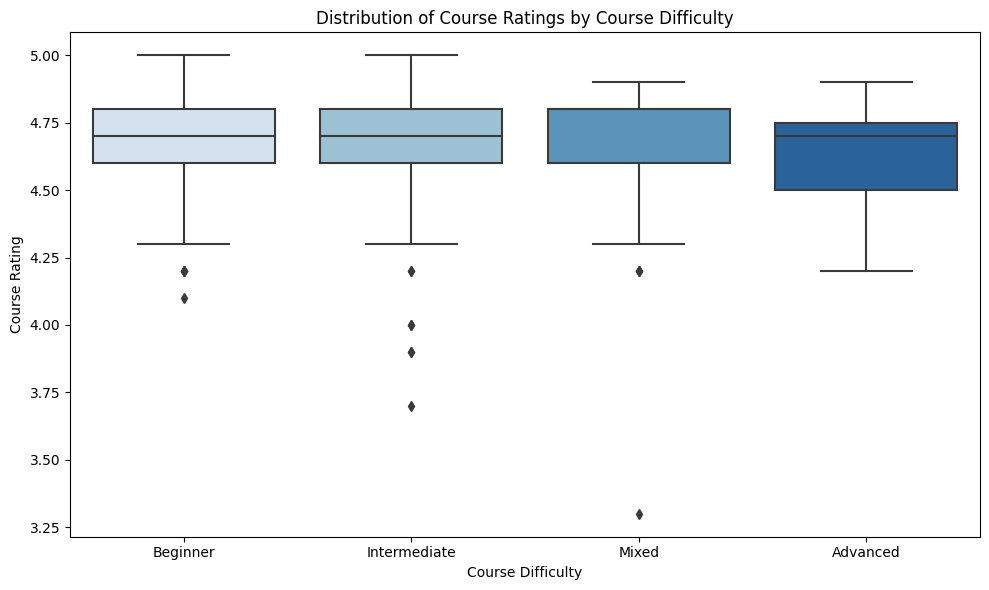

In [63]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    x='course_difficulty', 
    y='course_rating', 
    data=df, 
    palette='Blues'
)

plt.title('Distribution of Course Ratings by Course Difficulty')
plt.xlabel('Course Difficulty')
plt.ylabel('Course Rating')

plt.tight_layout()
plt.show()

- Rating Distribution: The spread of ratings are pretty narrow, so it means that the ratings has no big dispersion.
- Comparison Across Difficulties: By comparing the medians and the spread of the ratings, you can determine if certain difficulty levels tend to have higher or more consistent ratings.
- Median ratings are similar across difficulty levels, it may indicate that courses of all difficulties are perceived similarly by students.
- Intermediate box has the most extraordinary low values.

#### What is the correlation between course rating and students enrolled?

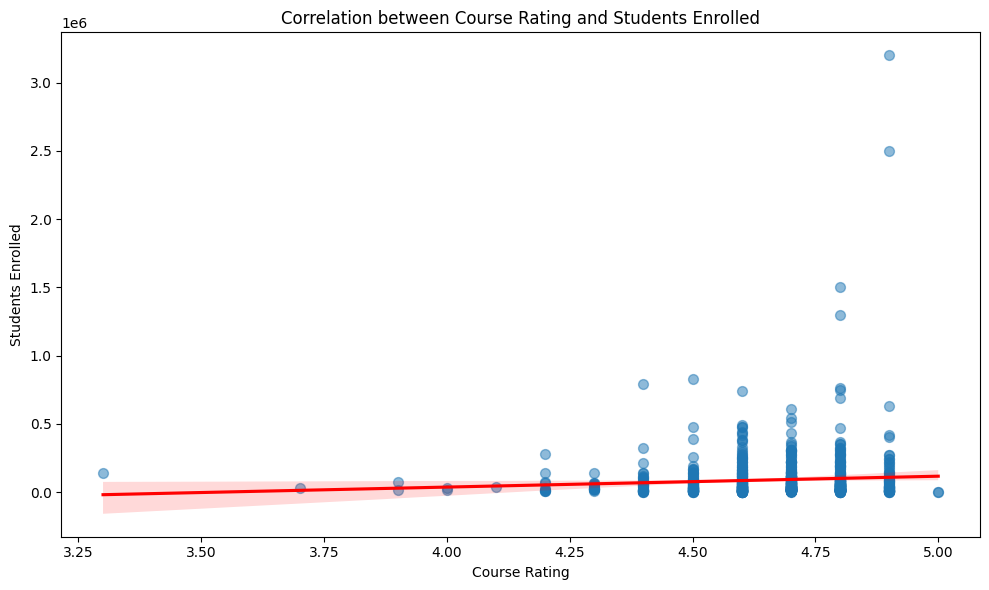

In [64]:
plt.figure(figsize=(10, 6))

sns.regplot(
    x="course_rating",
    y="course_students_enrolled",
    data=df,
    scatter_kws={"s": 50, "alpha": 0.5},  
    line_kws={"color": "red"},
)

plt.title("Correlation between Course Rating and Students Enrolled")
plt.xlabel("Course Rating")
plt.ylabel("Students Enrolled")

plt.tight_layout()
plt.show()

- The calculations and chart show a slight correlation between course ratings and the number of students enrolled, although the correlation is very weak. So, we cannot consider it as a legit one.

# Conclusion

There are 154 organizations with 891 courses in the dataset.

**There are 4 difficulty levels**:
1. Beginner with 487 courses.
2. Intermediate with 198 courses.
3. Mixed with 187 courses.
4. Advanced with 1 course.

**There are 3 course types**:
- COURSE with 582 courses
- SPECIALIZATION with 297 courses
- PROFESSIONAL CERTIFICATE with 12 courses
#### Course Rating by Certificate Type:

This boxplot shows the distribution of **course ratings** for each **certificate type**. It appears that the distribution of ratings is **fairly similar across different certificate types**, with most **ratings clustered around high values** (close to 5).

### Course Rating by Difficulty Level:

This boxplot shows the distribution of **course ratings** for each **difficulty level**. It indicates that **beginner** and **intermediate** courses have a high concentration of ratings around **4.5 to 5**, whereas advanced and mixed-level courses show a slightly wider spread in ratings.

#### The course difficulty levelt vs enrolled students
The impact of course difficulty is visible one: most of the students choose Mixed or Beginner studies.

#### Course rating
- Course rating seems to have almost no impact for students enrolled.
- 7 best rated organizations have a rating 4.9 and have only one course.

## Improvements for the future analysis
- To calculate correlations better some statistical analysis should be done.
- To find the reasoning behind the best course ratings and the popularity, more digging should be done.